In [15]:
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from RadialFlow import *
from MLtrain import *
from NormalizingFlows import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Radial Flows can be described by functions that have the form: 

$f(z) = z + \beta h(\alpha , r)(z-z_0)$

with $r = |z - z_0|$ and $h(\alpha , r) = \frac{1}{\alpha+r}$ and the parameters of the map $\lambda$ = { $z_0 \in \mathbb{R}^{D}$, $\alpha \in \mathbb{R}_+$ and $\beta \in \mathbb{R}$}.

The Jacobian is given by:

$ \frac{\partial f(z)}{\partial z} = \textbf{I} + \beta \big((z-z_0) \cdot h'(\alpha,r) \frac{\partial r}{\partial z} + h(\alpha,r)\textbf{I}\big) $

The determinant of the Jacobian is then equal to:

$ det \frac{\partial f(z)}{\partial z} = (1 + \beta h(\alpha,r) + \beta h'(\alpha,r)r)(1+ \beta h(\alpha,r))^{(D-1)}$

Furthermore, the parameters should satisfy $\beta \geq -\alpha$ in order to have an invertible tranformation.

In order to enforce the constraint $\alpha \in \mathbb{R}_+$, softplus$(\alpha) \in \mathbb{R}_+$ is used. 

For the constraint $\beta \geq -\alpha$, $\beta = -\alpha + \text{softplus}(\tilde{\beta}) > -\alpha$ is used.

(-5.0, 5.0)

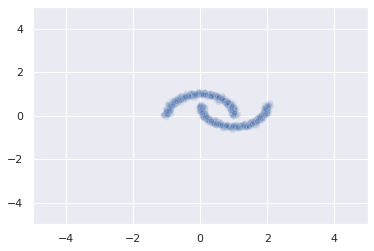

In [16]:
dataset = MoonDataset()

sns.scatterplot(x = dataset.X[:,0], y =dataset.X[:,1], alpha=0.1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

Epoch 0 -> loss: 2.62


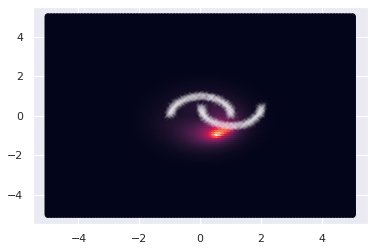

Epoch 200 -> loss: 2.02


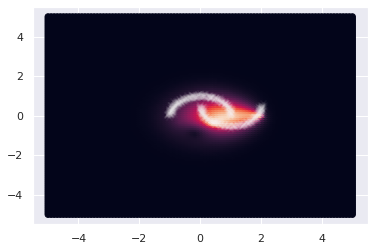

Epoch 400 -> loss: 1.78


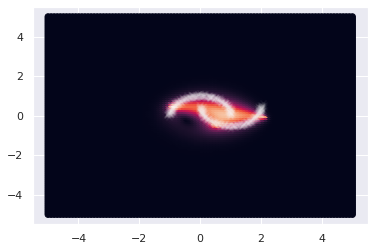

Epoch 600 -> loss: 1.71


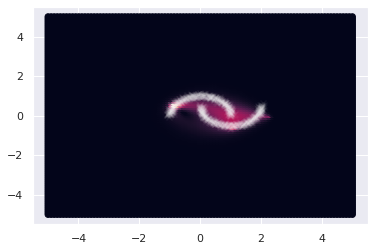

Epoch 800 -> loss: 1.67


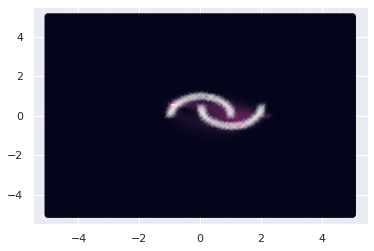

Epoch 1000 -> loss: 1.65


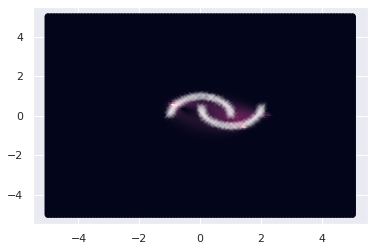

Epoch 1200 -> loss: 1.65


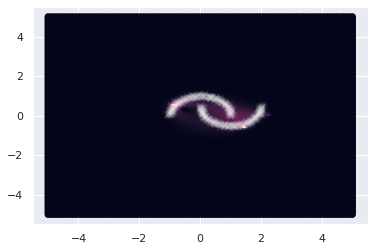

Epoch 1400 -> loss: 1.64


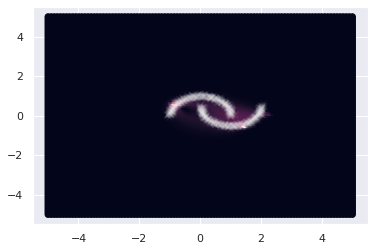

In [13]:
transforms = [InverseRadial() for _ in range(4)]
model = NormalizingFlows(transforms)
model, losses = train(model, dataset, max_epochs=1500)

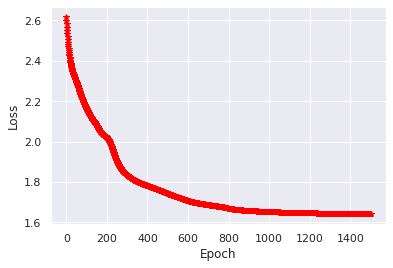

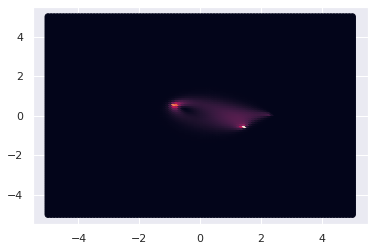

In [14]:
# Plots
plt.plot(losses, marker='*', c='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
density(model, [])

In [ ]:
transforms = [InverseRadial() for _ in range(16)]
model = NormalizingFlows(transforms)
model, losses = train(model, dataset_1, max_epochs=1500)

In [ ]:
# Plots
plt.plot(losses, marker='*', c='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
density(model, [], device=device)

In [ ]:
transforms = [InverseRadial() for _ in range(32)]
model = NormalizingFlows(transforms)
model, losses = train(model, dataset_1, max_epochs=1500)

In [ ]:
# Plots
plt.plot(losses, marker='*', c='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
density(model, [], device=device)